<a href="https://colab.research.google.com/github/surajgajul/Cocktails_model/blob/main/Cockatils_completeDenseNet201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Importing Libraries

In [ ]:
#Data Visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

#Sharpening of images
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

#Preprocessing of Images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Buliding Model
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

#Accuracy
from sklearn.metrics import classification_report

In [ ]:
data_dir = '/content/drive/MyDrive/Cocktails'
categories = os.listdir(data_dir)

In [ ]:
categories=sorted(categories)
print(categories)

['Bloody_mary', 'Cosmopolitan', 'Espresso_martini', 'Margarita', 'Mimosa', 'Mojito', 'Moscow_mule', 'Old_fashioned']


In [ ]:
labels=[i for i in range(len(categories))]
labels

[0, 1, 2, 3, 4, 5, 6, 7]

#### Making a dictionary with Classes as Keys and Indices as Values

In [ ]:
label_dict=dict(zip(categories, labels))
label_dict

{'Bloody_mary': 0,
 'Cosmopolitan': 1,
 'Espresso_martini': 2,
 'Margarita': 3,
 'Mimosa': 4,
 'Mojito': 5,
 'Moscow_mule': 6,
 'Old_fashioned': 7}

In [ ]:
data_list=[] #data_list- storing the images
labels_list=[] #label_list - storing the class labels

In [ ]:
data1="/content/drive/MyDrive/Cocktails/Bloody_mary"
data2="/content/drive/MyDrive/Cocktails/Cosmopolitan"
data3="/content/drive/MyDrive/Cocktails/Espresso_martini"
data4="/content/drive/MyDrive/Cocktails/Margarita"
data5="/content/drive/MyDrive/Cocktails/Mimosa"
data6="/content/drive/MyDrive/Cocktails/Mojito"
data7="/content/drive/MyDrive/Cocktails/Moscow_mule"
data8="/content/drive/MyDrive/Cocktails/Old_fashioned"
count_Bloody_mary=0
count_Cosmopolitan=0
count_Espresso_martini=0
count_Margarita=0
count_Mimosa=0
count_Mojito=0
count_Moscow_mule=0
count_Old_fashioned=0

In [ ]:
for i in os.listdir(data1):
        img_path=os.path.join(data1, i)
        count_Bloody_mary=count_Bloody_mary+1

In [ ]:
for i in os.listdir(data2):
        img_path=os.path.join(data2, i)
        count_Cosmopolitan=count_Cosmopolitan+1

In [ ]:
for i in os.listdir(data3):
        img_path=os.path.join(data3, i)
        count_Espresso_martini=count_Espresso_martini+1

In [ ]:
for i in os.listdir(data4):
        img_path=os.path.join(data4, i)
        count_Margarita=count_Margarita+1

In [ ]:
for i in os.listdir(data5):
        img_path=os.path.join(data5, i)
        count_Mimosa=count_Mimosa+1

In [ ]:
for i in os.listdir(data6):
        img_path=os.path.join(data6, i)
        count_Mojito=count_Mojito+1

In [ ]:
for i in os.listdir(data7):
        img_path=os.path.join(data7, i)
        count_Moscow_mule=count_Moscow_mule+1

In [ ]:
for i in os.listdir(data8):
        img_path=os.path.join(data8, i)
        count_Old_fashioned=count_Old_fashioned+1

In [ ]:
count_Bloody_mary,count_Cosmopolitan,count_Espresso_martini,count_Margarita,count_Mimosa,count_Mojito,count_Moscow_mule,count_Old_fashioned

(440, 437, 450, 438, 445, 450, 440, 434)

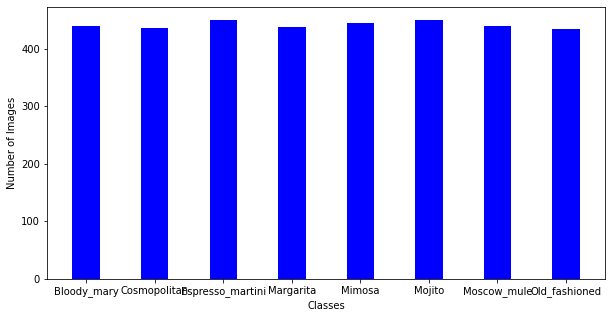

In [ ]:
fig = plt.figure(figsize = (10, 5))
classes=['Bloody_mary', 'Cosmopolitan', 'Espresso_martini', 'Margarita', 'Mimosa', 'Mojito', 'Moscow_mule', 'Old_fashioned']
values=[count_Bloody_mary,count_Cosmopolitan,count_Espresso_martini,count_Margarita,count_Mimosa,count_Mojito,count_Moscow_mule,count_Old_fashioned]
#creating the bar plot
plt.bar(classes, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

#### Defining a Sharpen Filter

In [ ]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

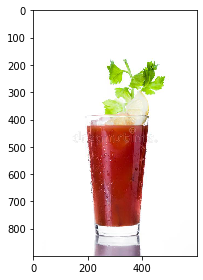

In [ ]:
og_image = imread(data_dir+'/Bloody_mary/bloody_mary-1.jpg')
imshow(og_image);

In [ ]:
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image

In [ ]:
def convolver_rgb(image, kernel, iterations = 1):
    img_yuv = rgb2yuv(image)   
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], kernel, 
                                     iterations)
    final_image = yuv2rgb(img_yuv)
    return final_image

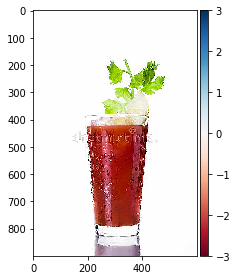

In [ ]:
final_image = convolver_rgb(og_image, sharpen, iterations = 1)
imshow(final_image);

#### Image Preprocessing
1.   Resizing to 224,224
2.   Sharpening



In [ ]:
from PIL import Image
import cv2
for i in categories:
    folder_path=os.path.join(data_dir, i) #path to each drink type folder
    img_names=os.listdir(folder_path)   #all images in each drink type folder
    for img_name in img_names:
        try:
          img_path=os.path.join(folder_path, img_name)
          if(img_path=='/content/data/Bloody_mary_copy/.DS_Store' or img_path=='/content/data/Cosmopolitan_copy/.DS_Store' or img_path=='/content/data/Espresso_martini_copy/.DS_Store' or img_path=='/content/data/Margarita_copy/.DS_Store'
            or img_path=='/content/data/Mimosa_copy/.DS_Store' or img_path=='/content/data/Mojito_copy/.DS_Store' or img_path=='/content/data/Moscow_mule_copy/.DS_Store' or img_path=='/content/data/Old_fashioned_copy/.DS_Store'):
            continue
          img = Image.open(img_path)
          img = img.resize((224,224))
          img = np.array(img)
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          # img = convolver_rgb(img, sharpen, iterations = 1)
          data_list.append(img)
          labels_list.append(label_dict[i])
        except:
          continue

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
data_list[0].shape

(224, 224, 3)

In [ ]:
lb = LabelEncoder()
labels_list = lb.fit_transform(labels_list)
labels_list = to_categorical(labels_list)

In [ ]:
data = np.array(data_list)
labels = np.array(labels_list)
print("Done")
print(data.shape)

Done
(3533, 224, 224, 3)


#### Visualizing Images in the Dataset after Preprocessing

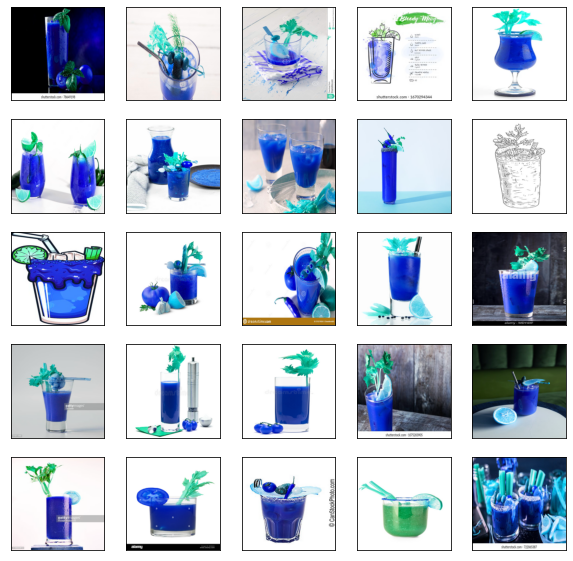

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[np.random.randint(224)], cmap=plt.cm.binary)
    
plt.show()

#### Image Augmentation

In [ ]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
type(aug)

keras.preprocessing.image.ImageDataGenerator

#### Splitting Dataset into Train and Test Sets

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [ ]:
print( trainX.shape, testX.shape, trainY.shape, testY.shape)

(2826, 224, 224, 3) (707, 224, 224, 3) (2826, 8) (707, 8)


#### The model

In [ ]:
from keras.applications.densenet import DenseNet201
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense ,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from keras.layers import Input

In [ ]:
base_model = DenseNet201(include_top=False,
                         input_shape=(224,224,3),
                         weights='imagenet',
                         pooling="avg"
                     )

74836368/74836368 [==============================] - 4s 0us/step


In [ ]:
from tensorflow.keras.regularizers import l2 

In [ ]:
base_model.trainable = False 
image_input = Input(shape=(224, 224, 3))

x = base_model(image_input,training = False)

x = Dense(256,activation = "relu")(x)
x = Dropout(0.2)(x)

x = Dense(128,activation = "relu")(x)
x = Dropout(0.2)(x)

image_output = Dense(8,kernel_regularizer=l2(0.01),activation="softmax")(x) #output layer
#kernel Regulariser- SVM

model = Model(image_input,image_output)
model.compile(optimizer="adam",loss="squared_hinge",metrics=["accuracy"])
#loss function is square hinged- SVM

In [ ]:
from tensorflow.keras.utils import plot_model

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.4184 to fit



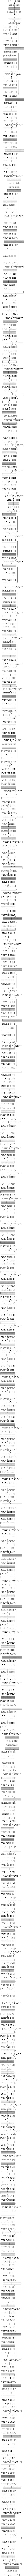

In [ ]:
plot_model(base_model, to_file = 'Densenet.png', show_shapes = True, show_layer_names = True)

#### Training the Model

In [ ]:
BS=64
EPOCHS=10

In [ ]:
history = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

Epoch 1/10
44/44 [==============================] - 86s 1s/step - loss: 1.3657 - accuracy: 0.2339 - val_loss: 1.3192 - val_accuracy: 0.3041
Epoch 2/10
44/44 [==============================] - 40s 901ms/step - loss: 1.2906 - accuracy: 0.3161 - val_loss: 1.2725 - val_accuracy: 0.3267
Epoch 3/10
44/44 [==============================] - 41s 927ms/step - loss: 1.2479 - accuracy: 0.3584 - val_loss: 1.2259 - val_accuracy: 0.3890
Epoch 4/10
44/44 [==============================] - 39s 889ms/step - loss: 1.2063 - accuracy: 0.4102 - val_loss: 1.1637 - val_accuracy: 0.4936
Epoch 5/10
44/44 [==============================] - 38s 866ms/step - loss: 1.1561 - accuracy: 0.4826 - val_loss: 1.1387 - val_accuracy: 0.5290
Epoch 6/10
44/44 [==============================] - 38s 855ms/step - loss: 1.1316 - accuracy: 0.5264 - val_loss: 1.1097 - val_accuracy: 0.5743
Epoch 7/10
44/44 [==============================] - 37s 850ms/step - loss: 1.1089 - accuracy: 0.5699 - val_loss: 1.1116 - val_accuracy: 0.5658
Ep

In [ ]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs))

[INFO] evaluating network...
12/12 [==============================] - 8s 426ms/step
              precision    recall  f1-score   support

           0       0.63      0.78      0.70        88
           1       0.69      0.64      0.67        87
           2       0.65      0.59      0.62        90
           3       0.61      0.39      0.47        88
           4       0.64      0.56      0.60        89
           5       0.69      0.78      0.73        90
           6       0.64      0.66      0.65        88
           7       0.43      0.54      0.48        87

    accuracy                           0.62       707
   macro avg       0.62      0.62      0.61       707
weighted avg       0.62      0.62      0.61       707



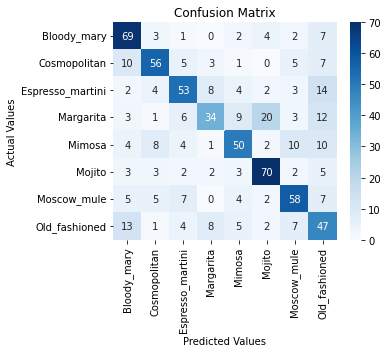

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(testY.argmax(axis=1), predIdxs)


cm_df = pd.DataFrame(cm,
                     index = ['Bloody_mary', 'Cosmopolitan', 'Espresso_martini', 'Margarita', 'Mimosa', 'Mojito', 'Moscow_mule', 'Old_fashioned'], 
                     columns = ['Bloody_mary', 'Cosmopolitan', 'Espresso_martini', 'Margarita', 'Mimosa', 'Mojito', 'Moscow_mule', 'Old_fashioned'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

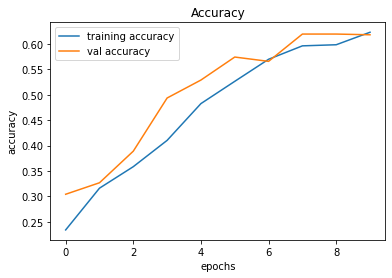

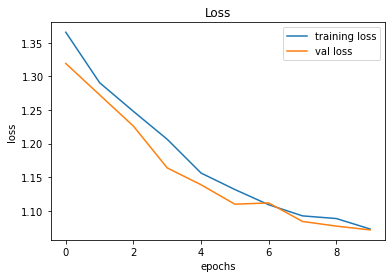

In [ ]:
import matplotlib.pyplot as plt
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Making the Predictions

In [ ]:
from keras.models import load_model
import os
from keras.preprocessing import image
import numpy as np
#model=load_model('/content/drive/MyDrive/Bev_Dataset/model.h5')
test_folder=os.listdir("/content/drive/MyDrive/Cocktails_Test")

In [ ]:
y_true=[]
for i in test_folder:
  for j in range(len(os.listdir(f"/content/drive/MyDrive/Cocktails_Test/{i}"))):
    y_true.append(i)

In [ ]:
import tensorflow
y_predicted=[]
for i in test_folder:
  for j in os.listdir(f"/content/drive/MyDrive/Cocktails_Test/{i}"):
    img = tensorflow.keras.utils.load_img(f"/content/drive/MyDrive/Cocktails_Test/{i}/{j}", target_size=(224,224))
    x = tensorflow.keras.utils.img_to_array(img)
    x=x/255
    x=x.reshape(224,224,3)
    x = np.expand_dims(x, axis=0)
    # with model_graph.as_default():
        #     with tf_session.as_default():
    predi=model.predict(x)
    print(predi)
    classes_x=np.argmax(predi)
        
    print(classes_x)
    classes=["Bloody_mary","Cosmopolitan","Espresso_martini","Margarita","Mimosa","Mojito","Moscow_mule","Olf_fashioned"]    
    MaxPosition=np.argmax(predi)  
    prediction_label=prediction_label=classes[MaxPosition]
    y_predicted.append(prediction_label)

1/1 [==============================] - 4s 4s/step
[[0.04081638 0.08716989 0.23127778 0.1629482  0.14754146 0.10186663
  0.06867835 0.15970133]]
2
1/1 [==============================] - 0s 93ms/step
[[0.03323644 0.09038846 0.29733795 0.18263493 0.10700747 0.139347
  0.05471639 0.09533136]]
2
1/1 [==============================] - 0s 69ms/step
[[0.00917762 0.03351994 0.7294905  0.08954643 0.03762167 0.02673468
  0.01385781 0.06005125]]
2
1/1 [==============================] - 0s 45ms/step
[[0.03088094 0.11013538 0.32490474 0.18281503 0.11281575 0.09647075
  0.04001659 0.10196082]]
2
1/1 [==============================] - 0s 42ms/step
[[0.0223115  0.06988772 0.39855337 0.2292285  0.07410434 0.08611939
  0.04298265 0.07681257]]
2
1/1 [==============================] - 0s 44ms/step
[[0.01154035 0.04829834 0.46188247 0.24571526 0.06671941 0.08141524
  0.02536146 0.05906757]]
2
1/1 [==============================] - 0s 43ms/step
[[0.02195507 0.07528421 0.3926336  0.16786547 0.10773506 0.09893

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(y_predicted)
print(y_true)
cm = confusion_matrix(y_true, y_predicted)
cm

['Espresso_martini', 'Espresso_martini', 'Espresso_martini', 'Espresso_martini', 'Espresso_martini', 'Espresso_martini', 'Espresso_martini', 'Espresso_martini', 'Espresso_martini', 'Margarita', 'Margarita', 'Mojito', 'Espresso_martini', 'Espresso_martini', 'Espresso_martini', 'Espresso_martini']
['Cosmopolitan', 'Cosmopolitan', 'Old_fashioned', 'Old_fashioned', 'Mojito', 'Mojito', 'Mimosa', 'Mimosa', 'Moscow_mule', 'Moscow_mule', 'Bloody_mary', 'Bloody_mary', 'Espresso_martini', 'Espresso_martini', 'Margarita', 'Margarita']


array([[0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0]])